<a href="https://colab.research.google.com/github/ftarakdjian/infovis/blob/gh-pages/KAGGLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INTRO

In [ ]:
# permiso para colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Descargo los datasets
df_train = pd.read_csv('/content/drive/MyDrive/PREDICTIVO TP2/datos.csv')
df_test = pd.read_csv("/content/drive/MyDrive/PREDICTIVO TP2/resultados.csv", sep=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#primera vista de los datos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   averageRating         900000 non-null  float64
 1   numVotes              900000 non-null  int64  
 2   titleType             899998 non-null  object 
 3   isAdult               899998 non-null  float64
 4   startYear             899998 non-null  object 
 5   endYear               899998 non-null  object 
 6   runtimeMinutes        899998 non-null  object 
 7   genres_x              899997 non-null  object 
 8   directors             899998 non-null  object 
 9   writers               899998 non-null  object 
 10  seasonNumber          403675 non-null  object 
 11  episodeNumber         403675 non-null  object 
 12  ordering              341292 non-null  float64
 13  language              341292 non-null  object 
 14  types                 341292 non-null  object 
 15  

#limpio train

#missings y tipos de datos

In [ ]:
#Elimino los NA de las variables continuas
contin_vars = ['numVotes', 'runtimeMinutes', 'budget', 'revenue', 'startYear','endYear','popularity','runtime']
for v in contin_vars: df_train.loc[df_train[v].isnull(), v] = 0
for v in contin_vars: df_train.loc[(df_train[v].isna()), v] = 0

In [ ]:
#ajusto tipos de datos
df_train=df_train.replace('\\N',0)
df_train['endYear']=df_train['endYear'].astype('int16')
df_train['startYear']=df_train['startYear'].astype('int16')
df_train['prod']=df_train['endYear']-df_train['startYear']

In [ ]:
df_train['runtimeMinutes']=df_train['runtimeMinutes'].replace('Game-Show',0)
df_train['runtimeMinutes']=df_train['runtimeMinutes'].astype('int16')

In [ ]:
def label_race (row, col):
    lab = {
        f[0]: 100,
        f[1]: 80,
        f[2]: 60,
        f[3]: 40,
        f[4]: 20,
    }
    return lab.get(row[col], 0)

#minutos

In [ ]:
#promedio de minutos por director
minutosDirector = df_train[df_train['runtimeMinutes'] > 0]
minutosDirector = minutosDirector.groupby([ "directors" ])[[ "runtimeMinutes" ]].mean()
minutosDirector.sort_values(by=['runtimeMinutes'],ascending=False)


,runtimeMinutes
directors,
"nm5492599,nm5492495,nm5492891,nm1432536",14400.0
nm4246748,5700.0
nm1267224,5220.0
"nm0248119,nm0227486,nm0192463,nm0942185,nm0324426",3900.0
"nm0631590,nm1374337,nm0007071,nm1005906,nm1785712,nm1376792",3900.0
...,...
nm1299757,1.0
"nm2669534,nm2696049",1.0
nm2144889,1.0


In [ ]:
df_train = df_train.join(minutosDirector, on = 'directors', how = 'left', rsuffix='_aux' )

In [ ]:
df_train['runtimeMinutes'] = np.where(df_train["runtimeMinutes"]==0,df_train["runtimeMinutes_aux"],df_train["runtimeMinutes"])

In [ ]:
df_train.columns
df_train = df_train[['averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_x', 'directors', 'writers',
       'seasonNumber', 'episodeNumber', 'ordering', 'language', 'types',
       'attributes', 'isOriginalTitle', 'adult', 'budget', 'genres_y',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video', 'id', 'prod']]

#directores

In [ ]:
f=df_train['directors'].value_counts()[1:6].index.tolist()
df_train['director_f'] = df_train.apply (lambda row: label_race(row,'directors'), axis=1)

In [ ]:
directores_mean = df_train.groupby([ "directors" ])[[ "averageRating" ]].mean()
directores_mean.sort_values(by=['averageRating'],ascending=False)

directores_count = df_train.groupby(["directors"])[["averageRating"]].count()
directores_count.sort_values(by= ['averageRating'],ascending=False)

directores = directores_count.join(directores_mean, on = 'directors', lsuffix= '_count', rsuffix= '_mean')
directores = directores[directores["averageRating_count"] > 100]
directores.sort_values(by= 'averageRating_mean', ascending = False)
#directores.sort_values(by= 'averageRating_count', ascending = False)




,averageRating_count,averageRating_mean
directors,,
nm1475126,369,9.785908
nm4355606,249,9.685542
nm4492923,253,9.537154
"nm7870411,nm7477059",117,9.429060
"nm7477059,nm7870411",139,9.418705
...,...,...
nm0644861,101,4.635644
nm0924920,340,4.527941
nm0676248,176,4.472727


In [ ]:
df_train = df_train.join(directores, on = 'directors', how= 'left')

In [ ]:

df_train['directors_p'] = np.where(df_train['averageRating_count'].isnull(), 0,1)
df_train['directors_p'] = [100 if (x> 8) else 70 if (x> 6) else 40 if (x> 4) else 10 if (x> 2) else 0 for x in df_train['averageRating_mean']]


In [ ]:
df_train = df_train[['averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_x', 'directors', 'writers',
       'seasonNumber', 'episodeNumber', 'ordering', 'language', 'types',
       'attributes', 'isOriginalTitle', 'adult', 'budget', 'genres_y',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video', 'id', 'prod', 'director_f', 'directors_p']]

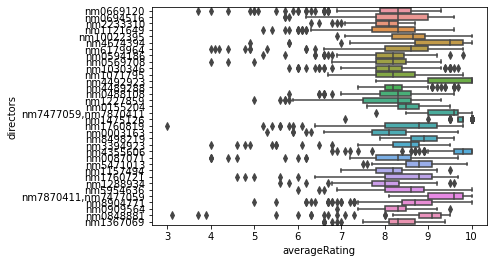

In [ ]:
directores_algunos = df_train[df_train['directors_p'] > 70]
ax = sns.boxplot(x=directores_algunos['averageRating'], y= directores_algunos['directors'])

#writers

In [ ]:
f=df_train['writers'].value_counts()[1:6].index.tolist()
df_train['writers_f'] = df_train.apply (lambda row: label_race(row,'writers'), axis=1)

In [ ]:
escritores_mean = df_train.groupby([ "writers" ])[[ "averageRating" ]].mean()
escritores_mean.sort_values(by=['averageRating'],ascending=False)

escritores_count = df_train.groupby(["writers"])[["averageRating"]].count()
escritores_count.sort_values(by= ['averageRating'],ascending=False)

escritores = escritores_count.join(escritores_mean, on = 'writers', lsuffix= '_count', rsuffix= '_mean')
escritores = escritores[escritores["averageRating_count"] > 100]
escritores.sort_values(by= 'averageRating_mean', ascending = False)

,averageRating_count,averageRating_mean
writers,,
nm1974030,315,9.828254
"nm3815573,nm6750552",213,9.773709
nm1475126,154,9.755195
nm11871999,102,9.639216
"nm7477076,nm9925322,nm1939626,nm8457565,nm3204856",249,9.426104
...,...,...
"nm3454839,nm2452107,nm2807724",102,4.847059
"nm0112944,nm0247243,nm0369870,nm0416853,nm0426351,nm0428568,nm0452929,nm0580528,nm0630497,nm2154640,nm0810431,nm0935540",112,4.720536
nm0298350,325,4.523692


In [ ]:
df_train = df_train.join(escritores, on = 'writers', how= 'left')

In [ ]:
df_train['writers_p'] = np.where(df_train['averageRating_count'].isnull(), 0,1)
df_train['writers_p'] = [100 if (x> 8) else 70 if (x> 6) else 40 if (x> 4) else 10 if (x> 2) else 0 for x in df_train['averageRating_mean']]



In [ ]:
df_train = df_train[['averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_x', 'directors', 'writers',
       'seasonNumber', 'episodeNumber', 'ordering', 'language', 'types',
       'attributes', 'isOriginalTitle', 'adult', 'budget', 'genres_y',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video', 'id', 'prod', 'director_f', 'directors_p',
       'writers_f', 'writers_p']]

#production companies

In [ ]:
f=df_train['production_companies'].value_counts()[1:6].index.tolist()
df_train['production_companies_f'] = df_train.apply (lambda row: label_race(row,'production_companies'), axis=1)

In [ ]:
empresas_mean = df_train.groupby([ "production_companies" ])[[ "averageRating" ]].mean()
empresas_mean.sort_values(by=['averageRating'],ascending=False)

empresas_count = df_train.groupby(["production_companies"])[["averageRating"]].count()
empresas_count.sort_values(by= ['averageRating'],ascending=False)

empresas = empresas_count.join(empresas_mean, on = 'production_companies', lsuffix= '_count', rsuffix= '_mean')
empresas = empresas[empresas["averageRating_count"] > 100]
empresas.sort_values(by= 'averageRating_mean', ascending = False)

,averageRating_count,averageRating_mean
production_companies,,
"[{'name': 'Mosfilm', 'id': 5120}]",117,7.429060
"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]",565,6.746195
"[{'name': 'Warner Bros.', 'id': 6194}]",648,6.614660
"[{'name': 'Paramount Pictures', 'id': 4}]",582,6.602749
"[{'name': 'RKO Radio Pictures', 'id': 6}]",311,6.548875
"[{'name': 'Columbia Pictures', 'id': 5}]",164,6.545122
"[{'name': 'Universal International Pictures (UI)', 'id': 10330}]",111,6.545045
"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]",884,6.536425
"[{'name': 'Columbia Pictures Corporation', 'id': 441}]",263,6.496578


#production countries

In [ ]:
f=df_train['production_countries'].value_counts()[1:6].index.tolist()
df_train['production_countries_f'] = df_train.apply (lambda row: label_race(row,'production_countries'), axis=1)

In [ ]:
paises_mean = df_train.groupby([ "production_countries" ])[[ "averageRating" ]].mean()
paises_mean.sort_values(by=['averageRating'],ascending=False)

paises_count = df_train.groupby(["production_countries"])[["averageRating"]].count()
paises_count.sort_values(by= ['averageRating'],ascending=False)

paises = paises_count.join(paises_mean, on = 'production_countries', lsuffix= '_count', rsuffix= '_mean')
paises = paises[paises["averageRating_count"] > 100]
paises.sort_values(by= 'averageRating_mean', ascending = False)

,averageRating_count,averageRating_mean
production_countries,,
"[{'iso_3166_1': 'IN', 'name': 'India'}]",579,6.843696
"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",1212,6.816419
"[{'iso_3166_1': 'PL', 'name': 'Poland'}]",157,6.813376
"[{'iso_3166_1': 'BR', 'name': 'Brazil'}]",167,6.800599
"[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'FR', 'name': 'France'}]",115,6.790435
"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",591,6.685956
"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",566,6.678799
"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'IT', 'name': 'Italy'}]",232,6.668966
"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",337,6.644510


#status

In [ ]:
f=df_train['status'].value_counts()[0:5].index.tolist()
df_train['status_f'] = df_train.apply (lambda row: label_race(row,'status'), axis=1)

In [ ]:
status_mean = df_train.groupby([ "status" ])[[ "averageRating" ]].mean()
status_mean.sort_values(by=['averageRating'],ascending=False)

status_count = df_train.groupby(["status"])[["averageRating"]].count()
status_count.sort_values(by= ['averageRating'],ascending=False)

status = status_count.join(status_mean, on = 'status', lsuffix= '_count', rsuffix= '_mean')
status = status[status["averageRating_count"] > 100]
status.sort_values(by= 'averageRating_mean', ascending = False)

,averageRating_count,averageRating_mean
status,,
Rumored,187,6.331016
Released,43297,6.271737


# generos

In [ ]:
f = df_train['genres_x'].value_counts()[1:6].index.tolist()
df_train['genres_f'] = df_train.apply (lambda row: label_race(row,'genres_x'), axis=1)

In [ ]:
generos_mean = df_train.groupby([ "genres_x" ])[[ "averageRating" ]].mean()
generos_mean.sort_values(by=['averageRating'],ascending=False)

generos_count = df_train.groupby(["genres_x"])[["averageRating"]].count()
generos_count.sort_values(by= ['averageRating'],ascending=False)

generos = generos_count.join(generos_mean, on = 'genres_x', lsuffix= '_count', rsuffix= '_mean')
generos = generos[generos["averageRating_count"] > 100]
generos.sort_values(by= 'averageRating_mean', ascending = False)

,averageRating_count,averageRating_mean
genres_x,,
"Comedy,Horror,Reality-TV",105,8.609524
"Horror,Reality-TV,Sci-Fi",134,8.517164
"Action,Drama,Music",157,8.444586
"Family,Fantasy,Music",429,8.278089
"Adventure,Biography,Crime",175,8.225714
...,...,...
"Horror,Thriller",2308,4.834705
"Action,Horror",214,4.740187
"Horror,Sci-Fi",713,4.711921


In [ ]:
df_train = df_train.join(generos, on = 'genres_x', how= 'left')

In [ ]:
df_train['genres_p'] = np.where(df_train['averageRating_count'].isnull(), 0,1)
df_train['genres_p'] = [100 if (x> 8) else 70 if (x> 6) else 40 if (x> 4) else 10 if (x> 2) else 0 for x in df_train['averageRating_mean']]


In [ ]:
df_train = df_train[['averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_x', 'directors', 'writers',
       'seasonNumber', 'episodeNumber', 'ordering', 'language', 'types',
       'attributes', 'isOriginalTitle', 'adult', 'budget', 'genres_y',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video', 'id', 'prod', 'director_f', 'directors_p',
       'writers_f', 'writers_p', 'production_companies_f',
       'production_countries_f', 'status_f', 'genres_f', 'genres_p']]


#Title type

In [ ]:
titulos_mean = df_train.groupby([ "titleType" ])[[ "averageRating" ]].mean()
titulos_mean.sort_values(by=['averageRating'],ascending=False)

titulos_count = df_train.groupby(["titleType"])[["averageRating"]].count()
titulos_count.sort_values(by= ['averageRating'],ascending=False)

titulos = titulos_count.join(titulos_mean, on = 'titleType', lsuffix= '_count', rsuffix= '_mean')
titulos = titulos[titulos["averageRating_count"] > 100]
titulos.sort_values(by= 'averageRating_mean', ascending = False)

,averageRating_count,averageRating_mean
titleType,,
tvEpisode,403690,7.392150
tvMiniSeries,9091,7.088109
videoGame,9944,7.019660
tvShort,1727,6.855646
tvSeries,59710,6.802765
short,102830,6.781752
tvSpecial,8124,6.759183
tvMovie,36964,6.611189
video,50568,6.568889


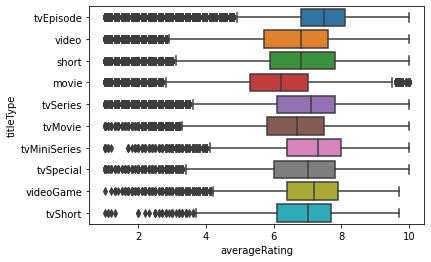

In [ ]:
ax = sns.boxplot(x=df_train['averageRating'], y= df_train['titleType'])

#lenguaje

In [ ]:
idiomas_mean = df_train.groupby([ "language" ])[[ "averageRating" ]].mean()
idiomas_mean.sort_values(by=['averageRating'],ascending=False)

idiomas_count = df_train.groupby(["language"])[["averageRating"]].count()
idiomas_count.sort_values(by= ['averageRating'],ascending=False)

idiomas = idiomas_count.join(idiomas_mean, on = 'language', lsuffix= '_count', rsuffix= '_mean')
#idiomas = idiomas[idiomas["averageRating_count"] > 100]
idiomas.sort_values(by= 'averageRating_mean', ascending = False)

,averageRating_count,averageRating_mean
language,,
fr,1,7.700000
haw,1,7.400000
myv,1,7.400000
0,339803,6.696597
es,256,6.483203
yi,17,6.405882
en,1213,6.296043


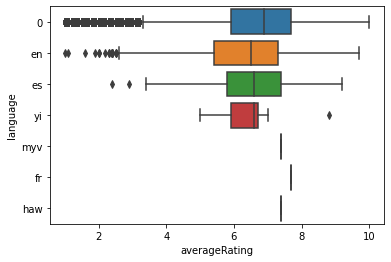

In [ ]:
ax = sns.boxplot(x=df_train['averageRating'], y= df_train['language'])

#datos para el modelo

In [ ]:
#Clasifico en categóricas y continuas
cat_vars = ['language','titleType'] 
contin_vars = ['startYear','endYear','prod', 'numVotes', 'runtimeMinutes', 'directors_p', 'production_companies_f', 'production_countries_f','status_f','popularity','genres_p', 'writers_p']

In [ ]:
# Genero variables dummys con las categóricas
for v in cat_vars: df_train=df_train.join(pd.get_dummies(df_train[v], drop_first=True), lsuffix = '_left', rsuffix = '_right')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 57 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   averageRating           900000 non-null  float64
 1   numVotes                900000 non-null  int64  
 2   titleType               899998 non-null  object 
 3   isAdult                 899998 non-null  float64
 4   startYear               900000 non-null  int16  
 5   endYear                 900000 non-null  int16  
 6   runtimeMinutes          900000 non-null  float64
 7   genres_x                899997 non-null  object 
 8   directors               899998 non-null  object 
 9   writers                 899998 non-null  object 
 10  seasonNumber            403675 non-null  object 
 11  episodeNumber           403675 non-null  object 
 12  ordering                341292 non-null  float64
 13  language                341292 non-null  object 
 14  types               

In [ ]:
#Selección de variables para el modelo
algunas=contin_vars+['en', 'es','short', 'tvEpisode', 'tvMiniSeries',
       'tvMovie', 'tvSeries', 'tvShort', 'tvSpecial', 'video_right', 'videoGame']


In [ ]:
df_train.columns

Index(['averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_x', 'directors', 'writers',
       'seasonNumber', 'episodeNumber', 'ordering', 'language', 'types',
       'attributes', 'isOriginalTitle', 'adult', 'budget', 'genres_y',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video', 'id', 'prod', 'director_f', 'directors_p',
       'writers_f', 'writers_p', 'production_companies_f',
       'production_countries_f', 'status_f', 'genres_f', 'genres_p', 'en',
       'es', 'fr', 'haw', 'myv', 'yi'],
      dtype='object')

In [ ]:
algunas

['startYear',
 'endYear',
 'prod',
 'numVotes',
 'runtimeMinutes',
 'directors_p',
 'production_companies_f',
 'production_countries_f',
 'status_f',
 'popularity',
 'genres_p',
 'writers_p',
 'en',
 'es',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video_right',
 'videoGame']

##modelo arboles

In [ ]:
X = np.array(df_train[algunas])
Y = df_train['averageRating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.75)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)


(675000, 23)
(675000,)
(225000, 23)
(225000,)


(None, None)

In [ ]:
resultados=[]

In [ ]:
list(range(25,100,25))

[25, 50, 75]

In [ ]:
for x in range(25,100,25):
 ETreg=ExtraTreesRegressor(n_estimators = x, max_depth=34)
 ETres=ETreg.fit(X_train, y_train)
 r2_1 = ETres.score(X_train,y_train)
 r2_2 = ETres.score(X_test, y_test)
 resultados.append([x,r2_1,r2_2])

In [ ]:
resultados = pd.DataFrame(resultados, columns=["x","r2_1","r2_2"])
resultados

,x,r2_1,r2_2
0,25,0.595934,0.257648
1,50,0.591909,0.261557
2,75,0.607283,0.261193


In [ ]:
depth = []

In [ ]:
for x in range(15,40,5):
 ETreg=ExtraTreesRegressor(n_estimators = 50, max_depth=x, bootstrap = True)
 ETres=ETreg.fit(X_train, y_train)
 r2_1 = ETres.score(X_train,y_train)
 r2_2 = ETres.score(X_test, y_test)
 depth.append([x,r2_1,r2_2])

In [ ]:
depth_ideal = pd.DataFrame(depth, columns=["x","r2_1","r2_2"])
depth_ideal

,x,r2_1,r2_2
0,15,0.183409,0.174982
1,20,0.249087,0.216431
2,25,0.340206,0.254151
3,30,0.453895,0.276424
4,35,0.589236,0.268847


In [ ]:
# Extra trees regressor

ETreg=ExtraTreesRegressor(n_estimators = 50, max_depth=30, bootstrap = True)

ETres=ETreg.fit(X_train, y_train)

In [ ]:
# random forest regressor

ETreg=RandomForestRegressor(n_estimators = 50, max_depth=30, bootstrap = True)

ETres=ETreg.fit(X_train, y_train)

In [ ]:
ETres.score(X_train,y_train)

0.5728543512046598

In [ ]:
ETres.score(X_test, y_test)

0.3155163028141993

In [ ]:
RFres.score(X_train,y_train)

In [ ]:
RFres.score(X_test, y_test)


0.5781835281382448

In [ ]:
X=np.array(df_test[algunas])
resultado= RFreg.predict(X)

In [ ]:
salida = pd.DataFrame(data={"averageRating": resultado}).astype(str)
salida.index = df_test.id
salida.to_csv("AB.csv", sep=',',index=True,  index_label='id')

# limpio testing

In [ ]:
#Elimino los NA de las variables continuas
contin_vars = df_test[['numVotes', 'runtimeMinutes', 'budget', 'revenue', 'startYear','endYear','popularity','runtime']]
for v in contin_vars: df_test.loc[df_test[v].isnull(), v] = 0
for v in contin_vars: df_test.loc[(df_test[v].isna()), v] = 0

In [ ]:
df_test=df_test.replace('\\N',0)
df_test['endYear']=df_test['endYear'].astype('int16')
df_test['startYear']=df_test['startYear'].astype('int16')
df_test['prod']=df_test['endYear']-df_test['startYear']

In [ ]:
df_test['runtimeMinutes']=df_test['runtimeMinutes'].replace('Reality-TV',0)
df_test['runtimeMinutes']=df_test['runtimeMinutes'].astype('int16')

In [ ]:
f=df_test['directors'].value_counts()[1:6].index.tolist()
df_test['director_f'] = df_test.apply (lambda row: label_race(row,'directors'), axis=1)

In [ ]:
f=df_test['writers'].value_counts()[1:6].index.tolist()
df_test['writers_f'] = df_test.apply (lambda row: label_race(row,'writers'), axis=1)

In [ ]:
f=df_test['production_companies'].value_counts()[1:6].index.tolist()
df_test['production_companies_f'] = df_test.apply (lambda row: label_race(row,'production_companies'), axis=1)

In [ ]:
f=df_test['production_countries'].value_counts()[1:6].index.tolist()
df_test['production_countries_f'] = df_test.apply (lambda row: label_race(row,'production_countries'), axis=1)

In [ ]:
f=df_test['status'].value_counts()[0:5].index.tolist()
df_test['status_f'] = df_test.apply (lambda row: label_race(row,'status'), axis=1)

#minutos

In [ ]:
minutosDirector = df_train[df_train['runtimeMinutes'] > 0]
minutosDirector = minutosDirector.groupby([ "directors" ])[[ "runtimeMinutes" ]].mean()
minutosDirector.sort_values(by=['runtimeMinutes'],ascending=False)

,runtimeMinutes
directors,
"nm5492599,nm5492495,nm5492891,nm1432536",14400.0
nm4246748,5700.0
nm1267224,5220.0
"nm0248119,nm0227486,nm0192463,nm0942185,nm0324426",3900.0
"nm0631590,nm1374337,nm0007071,nm1005906,nm1785712,nm1376792",3900.0
...,...
nm1299757,1.0
"nm2669534,nm2696049",1.0
nm2144889,1.0


In [ ]:
df_test = df_test.join(minutosDirector, on = 'directors', how = 'left', rsuffix='_aux' )


In [ ]:
df_test['runtimeMinutes'] = np.where(df_test["runtimeMinutes"]==0,df_test["runtimeMinutes_aux"],df_test["runtimeMinutes"])

#directores

In [ ]:
directores_mean = df_train.groupby([ "directors" ])[[ "averageRating" ]].mean()
directores_mean.sort_values(by=['averageRating'],ascending=False)

directores_count = df_train.groupby(["directors"])[["averageRating"]].count()
directores_count.sort_values(by= ['averageRating'],ascending=False)

directores = directores_count.join(directores_mean, on = 'directors', lsuffix= '_count', rsuffix= '_mean')
directores = directores[directores["averageRating_count"] > 100]
directores.sort_values(by= 'averageRating_mean', ascending = False)
#directores.sort_values(by= 'averageRating_count', ascending = False)

,averageRating_count,averageRating_mean
directors,,
nm1475126,369,9.785908
nm4355606,249,9.685542
nm4492923,253,9.537154
"nm7870411,nm7477059",117,9.429060
"nm7477059,nm7870411",139,9.418705
...,...,...
nm0644861,101,4.635644
nm0924920,340,4.527941
nm0676248,176,4.472727


In [ ]:
df_test = df_test.join(directores, on = 'directors', how= 'left')

In [ ]:
df_test['directors_p'] = np.where(df_test['averageRating_count'].isnull(), 0,1)
df_test['directors_p'] = [100 if (x> 8) else 70 if (x> 6) else 40 if (x> 4) else 10 if (x> 2) else 0 for x in df_test['averageRating_mean']]

In [ ]:
df_test.head(5)
df_test.columns
df_test = df_test[['numVotes', 'titleType', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres_x', 'directors', 'writers', 'seasonNumber',
       'episodeNumber', 'ordering', 'language', 'types', 'attributes',
       'isOriginalTitle', 'adult', 'budget', 'genres_y', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video', 'id', 'prod', 'director_f', 'writers_f',
       'production_companies_f', 'production_countries_f', 'status_f',
        'directors_p']]


#writers

In [ ]:
escritores_mean = df_train.groupby([ "writers" ])[[ "averageRating" ]].mean()
escritores_mean.sort_values(by=['averageRating'],ascending=False)

escritores_count = df_train.groupby(["writers"])[["averageRating"]].count()
escritores_count.sort_values(by= ['averageRating'],ascending=False)

escritores = escritores_count.join(escritores_mean, on = 'writers', lsuffix= '_count', rsuffix= '_mean')
escritores = escritores[escritores["averageRating_count"] > 100]
escritores.sort_values(by= 'averageRating_mean', ascending = False)

,averageRating_count,averageRating_mean
writers,,
nm1974030,315,9.828254
"nm3815573,nm6750552",213,9.773709
nm1475126,154,9.755195
nm11871999,102,9.639216
"nm7477076,nm9925322,nm1939626,nm8457565,nm3204856",249,9.426104
...,...,...
"nm3454839,nm2452107,nm2807724",102,4.847059
"nm0112944,nm0247243,nm0369870,nm0416853,nm0426351,nm0428568,nm0452929,nm0580528,nm0630497,nm2154640,nm0810431,nm0935540",112,4.720536
nm0298350,325,4.523692


In [ ]:
df_test = df_test.join(escritores, on = 'writers', how= 'left')

In [ ]:
df_test['writers_p'] = np.where(df_test['averageRating_count'].isnull(), 0,1)
df_test['writers_p'] = [100 if (x> 8) else 70 if (x> 6) else 40 if (x> 4) else 10 if (x> 2) else 0 for x in df_test['averageRating_mean']]

In [ ]:
df_test.head(5)
df_test.columns
df_test = df_test[['numVotes', 'titleType', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres_x', 'directors', 'writers', 'seasonNumber',
       'episodeNumber', 'ordering', 'language', 'types', 'attributes',
       'isOriginalTitle', 'adult', 'budget', 'genres_y', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video', 'id', 'prod', 'director_f', 'writers_f',
       'production_companies_f', 'production_countries_f', 'status_f',
       'directors_p', 'writers_p']]

#generos

In [ ]:
generos_mean = df_train.groupby([ "genres_x" ])[[ "averageRating" ]].mean()
generos_mean.sort_values(by=['averageRating'],ascending=False)

generos_count = df_train.groupby(["genres_x"])[["averageRating"]].count()
generos_count.sort_values(by= ['averageRating'],ascending=False)

generos = generos_count.join(generos_mean, on = 'genres_x', lsuffix= '_count', rsuffix= '_mean')
generos = generos[generos["averageRating_count"] > 100]
generos.sort_values(by= 'averageRating_mean', ascending = False)

,averageRating_count,averageRating_mean
genres_x,,
"Comedy,Horror,Reality-TV",105,8.609524
"Horror,Reality-TV,Sci-Fi",134,8.517164
"Action,Drama,Music",157,8.444586
"Family,Fantasy,Music",429,8.278089
"Adventure,Biography,Crime",175,8.225714
...,...,...
"Horror,Thriller",2308,4.834705
"Action,Horror",214,4.740187
"Horror,Sci-Fi",713,4.711921


In [ ]:
df_test = df_test.join(generos, on = 'genres_x', how= 'left')

In [ ]:
df_test['genres_p'] = np.where(df_test['averageRating_count'].isnull(), 0,1)
df_test['genres_p'] = [100 if (x> 8) else 70 if (x> 6) else 40 if (x> 4) else 10 if (x> 2) else 0 for x in df_test['averageRating_mean']]


In [ ]:
df_test.head(5)
df_test.columns
df_test = df_test[['numVotes', 'titleType', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres_x', 'directors', 'writers', 'seasonNumber',
       'episodeNumber', 'ordering', 'language', 'types', 'attributes',
       'isOriginalTitle', 'adult', 'budget', 'genres_y', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video', 'id', 'prod', 'director_f', 'writers_f',
       'production_companies_f', 'production_countries_f', 'status_f',
       'directors_p', 'writers_p', 'genres_p']]

#preparo modelo test

In [ ]:
for v in cat_vars: df_test=df_test.join(pd.get_dummies(df_test[v], drop_first=True), lsuffix = '_left', rsuffix = '_right')


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321932 entries, 0 to 321931
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   numVotes                321932 non-null  int64  
 1   titleType               321929 non-null  object 
 2   isAdult                 321929 non-null  float64
 3   startYear               321932 non-null  int16  
 4   endYear                 321932 non-null  int16  
 5   runtimeMinutes          302354 non-null  float64
 6   genres_x                321928 non-null  object 
 7   directors               321929 non-null  object 
 8   writers                 321929 non-null  object 
 9   seasonNumber            143956 non-null  object 
 10  episodeNumber           143956 non-null  object 
 11  ordering                122148 non-null  float64
 12  language                122148 non-null  object 
 13  types                   122148 non-null  object 
 14  attributes          

In [ ]:
algunas

['startYear',
 'endYear',
 'prod',
 'numVotes',
 'runtimeMinutes',
 'directors_p',
 'production_companies_f',
 'production_countries_f',
 'status_f',
 'popularity',
 'genres_p',
 'writers_p',
 'en',
 'es',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video_right',
 'videoGame']

In [ ]:
X=np.array(df_test[algunas])
resultado= ETreg.predict(X)

In [ ]:
resultado

array([6.43141954, 8.37160606, 8.07407101, ..., 5.80344038, 5.3740379 ,
       7.97672445])

In [ ]:
# Finalmente generar un CSV con los resultados aplicados al CSV de resultados que no contiene la columna target

salida = pd.DataFrame(data={"averageRating": resultado}).astype(str)
salida.index = df_test.id
salida.to_csv("ojala.csv", sep=',',index=True,  index_label='id')